In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [0]:
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Scrape for reviews on Amazon

In [0]:
header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'} 

In [0]:
# scrape the webpage by product name
def Search(search_query):
    url="https://www.amazon.in/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [0]:
# save asin numbers in a list
games = ['fifa+20','BATTLEFIELD 1', 'BATTLEFIELD 4', 'SIMS 4', 'FIFA 18','BATTLEFRONT 2', 'MASS EFFECT: ANDROMEDA',\
         'TITANFALL 2','NFS PAYBACK']
product_name = []
data_asin=[]
for idx, game in enumerate(games):
    response=Search(game.replace(' ','+'))
    soup=BeautifulSoup(response.content, "lxml")
    for i in soup.findAll('span',attrs={'class':'a-size-medium a-color-base a-text-normal'}):
        product_name.append(i.text)
        if len(product_name) == 4 * (idx+1):
            break
    for i in soup.findAll("div",{'class':"sg-col-20-of-24 s-result-item sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28"}):
        data_asin.append(i['data-asin'])
        if len(data_asin) == 4 * (idx+1):
            break
    

https://www.amazon.in/s?k=fifa+20
https://www.amazon.in/s?k=BATTLEFIELD+1
https://www.amazon.in/s?k=BATTLEFIELD+4
https://www.amazon.in/s?k=SIMS+4
https://www.amazon.in/s?k=FIFA+18
https://www.amazon.in/s?k=BATTLEFRONT+2
https://www.amazon.in/s?k=MASS+EFFECT:+ANDROMEDA
https://www.amazon.in/s?k=TITANFALL+2
https://www.amazon.in/s?k=NFS+PAYBACK


In [0]:
product_name

['FIFA 20 (PS4)',
 'FIFA 20 (Xbox One)',
 'FIFA 20 (PC)',
 'FIFA 20 Legacy Edition (Switch)',
 'Battlefield 1 (PS4)',
 'Battlefield 1 - Revolution (PS4)',
 'Battlefield V (PS4)',
 'Battlefield 1 - PlayStation 4',
 'Battlefield 4 - Standard Edition (PC)',
 'Battlefield 4 Premium Edition for PS4',
 'Battlefield 4 - Standard Edition (PS4)',
 'Battlefield V (PS4)',
 'SIMS 4 (PS4)',
 'The Sims 4 (PC Code)',
 'The Sims 4 - PlayStation 4',
 'The Sims 4 - Standard Edition',
 'EA Sports FIFA 18 (PS4)',
 'fifa 18 (xbox one) (Xbox One)',
 'EA Sports FIFA 18 (PS4)',
 'FIFA 20 (PS4)',
 'Star Wars Battlefront 2 (Xbox One)',
 'Star Wars Battlefront II: Elite Trooper - Deluxe Edition (PS4)',
 'STAR WARS Jedi: Fallen Order (PS4)',
 'Star Wars: Battlefront (Xbox One)',
 'Mass Effect - Andromeda (PS4)',
 'Mass Effect Andromeda - PlayStation 4',
 'Mass Effect Trilogy (PC)',
 'Mass Effect Andromeda Deluxe - Xbox One',
 'Titanfall 2 - PlayStation 4',
 'Titanfall 2 (PS4)',
 'titanfall 2 with bonus nitro scor

In [0]:
# scrape link of the All customer reviews using asin number
def Searchasin(asin):
    url="https://www.amazon.in/dp/"+asin
    print(url)
    page=requests.get(url,headers=header) #cookies=cookie
    if page.status_code==200:
        return page
    else:
        return "Error"

In [0]:
# extract all the ‘see all customer reviews’ links of each product
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin[i])
    soup=BeautifulSoup(response.content,"lxml")
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.in/dp/B07VMSDHK4
https://www.amazon.in/dp/B07VMSBYFV
https://www.amazon.in/dp/B07VNS5QQN
https://www.amazon.in/dp/B07VSZF5X3
https://www.amazon.in/dp/B01FH6YI9A
https://www.amazon.in/dp/B074QX22KX
https://www.amazon.in/dp/B07D9QBZ88
https://www.amazon.in/dp/B01F9HMO2K
https://www.amazon.in/dp/B00HR4GJ16
https://www.amazon.in/dp/B00ORLCHH2
https://www.amazon.in/dp/B00BT9DTCM
https://www.amazon.in/dp/B07D9QBZ88
https://www.amazon.in/dp/B0749QKW74
https://www.amazon.in/dp/B019XUAME6
https://www.amazon.in/dp/B0748XK1KM
https://www.amazon.in/dp/B00KHJLXN2
https://www.amazon.in/dp/B071ZZZ3K9
https://www.amazon.in/dp/B072153HX9
https://www.amazon.in/dp/B07771ZN1Z
https://www.amazon.in/dp/B07VMSDHK4
https://www.amazon.in/dp/B07259Z5C8
https://www.amazon.in/dp/B072R3PR8Q
https://www.amazon.in/dp/B07W7KV12B
https://www.amazon.in/dp/B00ZP9GVH2
https://www.amazon.in/dp/B00KHJLLB6
https://www.amazon.in/dp/B01N00X3DH
https://www.amazon.in/dp/B0050SZ980
https://www.amazon.in/dp/B01

In [0]:
# Scrapping all customer reviews
def Searchreviews(review_link):
    url="https://www.amazon.in"+review_link
#     print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [0]:
# extract all the customer reviews (scrape for 15 pages of reviews) and store it in a list
reviews=[]
ratings=[]
review_date = []
game_name = []
for j in range(len(link)):
    for k in range(15):
        response=Searchreviews(link[j]+'&pageNumber='+str(k))
        soup=BeautifulSoup(response.content,"lxml")
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            game_name.append(link[j].strip().split('/')[1])
            reviews.append(i.text)
        for i in soup.findAll("span",{'data-hook':"review-date"}):
            review_date.append(i.text)
        for star in soup.findAll("i",attrs={'data-hook':"review-star-rating"}):
            ratings.append(star.text) 
    print('{}/{} pages done'.format(j+1, len(link)))

1/35 pages done
2/35 pages done
3/35 pages done
4/35 pages done
5/35 pages done
6/35 pages done
7/35 pages done
8/35 pages done
9/35 pages done
10/35 pages done
11/35 pages done
12/35 pages done
13/35 pages done
14/35 pages done
15/35 pages done
16/35 pages done
17/35 pages done
18/35 pages done
19/35 pages done
20/35 pages done
21/35 pages done
22/35 pages done
23/35 pages done
24/35 pages done
25/35 pages done
26/35 pages done
27/35 pages done
28/35 pages done
29/35 pages done
30/35 pages done
31/35 pages done
32/35 pages done
33/35 pages done
34/35 pages done
35/35 pages done


### complie the results into a dataframe

In [0]:
df=pd.DataFrame(columns=['review']) 
df['review']=reviews
df['rating']=ratings
df['game_name'] = game_name
df['review_date'] = review_date

In [0]:
# df.to_csv('reviews.csv',index=False)

# Analysis on the reviews: Topic Modelling

### preprocess the text

In [0]:
df = pd.read_csv('/content/drive/My Drive/EA Datathon/reviews.csv')

In [0]:
import re
from datetime import datetime
df['review'] = df['review'].apply(lambda x: x.replace('\n',''))
df['review'] = df['review'].map(lambda x: x.lower())
df['rating']= df['rating'].apply(lambda x: float(x.strip().split(' ')[0]))
df['review_date'] = df['review_date'].apply(lambda x: x.replace('Reviewed in India on ','').strip())
df['review_date'] = pd.to_datetime(df['review_date'])

In [0]:
# import nltk
# nltk.download('stopwords')

In [0]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import FreqDist
stop_words = set(stopwords.words('english')) 

df['review'] = df['review'].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))
df['review'] = df['review'].map(lambda x: re.sub('[^a-zA-Z0-9 _]','',x))

In [0]:
display(df)

,review,rating,game_name,review_date
0,game show correct indian map jammu kashmir par...,1.0,EA-FIFA-20-PS4,2019-09-28
1,terrible product ea sloppy years never expecte...,1.0,EA-FIFA-20-PS4,2019-09-29
2,absolute garbage game false advertising ea sta...,1.0,EA-FIFA-20-PS4,2019-09-27
3,love fifa 20 lot im playing fifa fifa 08 year ...,5.0,EA-FIFA-20-PS4,2019-10-01
4,full bugscannot swap players keeps kicking awa...,1.0,EA-FIFA-20-PS4,2019-09-29
...,...,...,...,...
1974,worth price,5.0,Need-Speed-Rivals-Hits-PS4,2019-07-05
1975,loved it sealed one without problems,5.0,Need-Speed-Rivals-Hits-PS4,2016-07-25
1976,worst experience first order,1.0,Need-Speed-Rivals-Hits-PS4,2016-12-11
1977,good game better go latest version,5.0,Need-Speed-Rivals-Hits-PS4,2018-03-01


### EDA: most common words

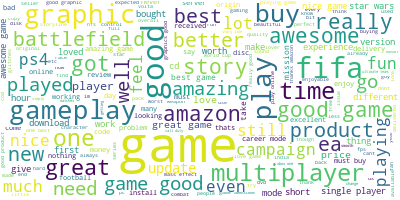

In [0]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(df['review'].values))

wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3, max_font_size=50, contour_color='steelblue')
wordcloud.generate(long_string)
# plt.figure(figsize=[10,10])
# plt.axis('off')
# plt.imshow(wordcloud)
wordcloud.to_image()


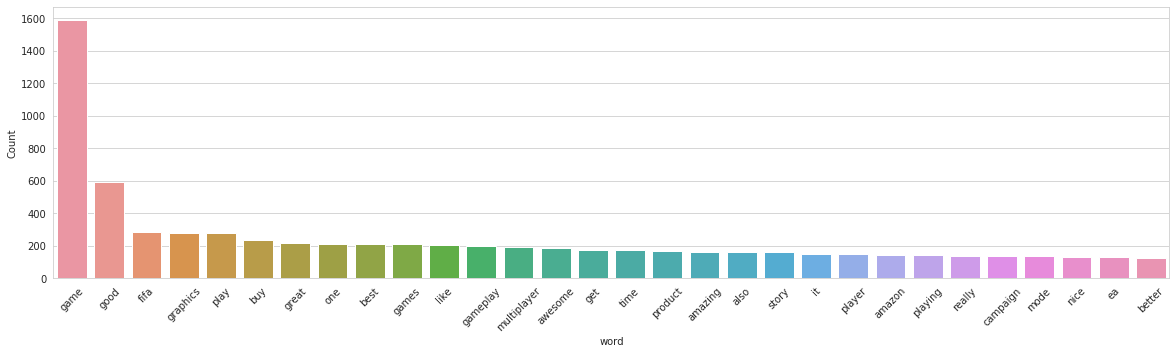

In [0]:
def plot_most_common_words(long_string, num=30):
  all_words = long_string.split()
  fdist = FreqDist(all_words)

  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  # top 20 most frequent words
  d = words_df.nlargest(columns="count", n = num) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= 'word', y = 'count')
  ax.set(ylabel = 'Count')
  for item in ax.get_xticklabels():
      item.set_rotation(45)
  plt.show()

plot_most_common_words(long_string)

we still have neutral terms like ‘one’, ‘it’, ‘also’, ‘get’, ‘really’ which are not that relevant.

### Lemmatization
To further remove noise from the text we can use lemmatization from the spaCy library. 

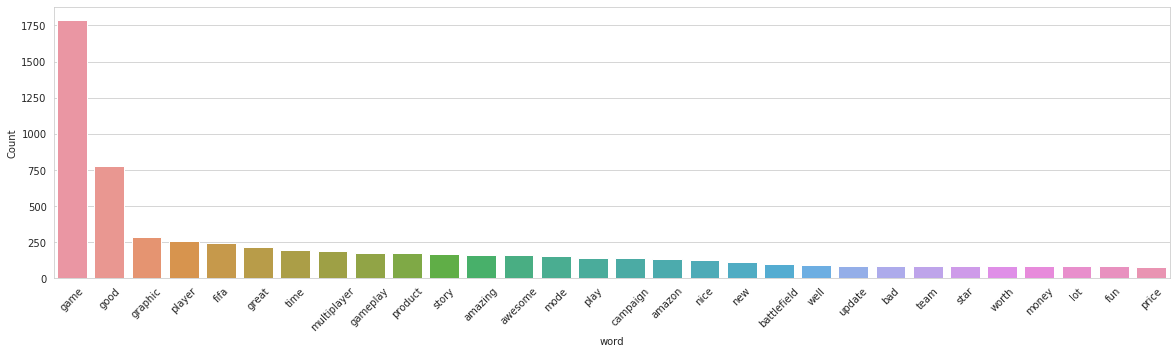

In [0]:
sp = spacy.load('en', disable=['parser', 'ner'])

tags=['NOUN', 'ADJ']
doc = sp(long_string)
lemmatized_reviews = " ".join([token.lemma_ for token in doc if token.pos_ in tags])

plot_most_common_words(lemmatized_reviews)

### Positive V.S. Negative reviews

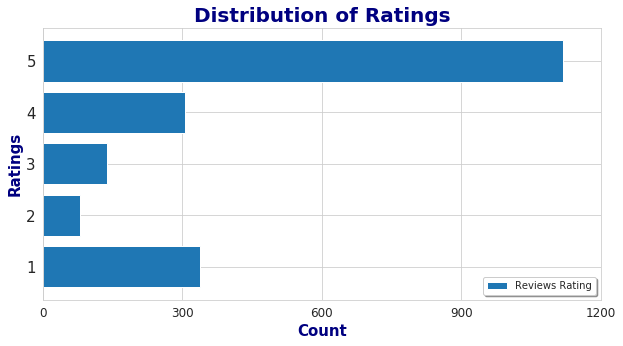

In [0]:
plt.figure(figsize = [10,5])

x = list(df['rating'].value_counts().index)
y = df['rating'].value_counts().values
plt.barh(x, y)

plt.xticks(np.linspace(0, 1200, 5), fontsize=12)
plt.yticks(size=15)

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'],shadow=True, loc=4)
plt.show()

filter out all 4 or 5-star rating comments to look for reasons why people like it and perform topic modelling using tfidf Vectorizer model

In [0]:
tags=['NOUN', 'ADJ', 'VERB']
df['lemmatized_reviews'] = df['review'].apply(lambda x: " ".join([token.lemma_ for token in sp(x) if token.pos_ in tags]))


In [0]:
df_pos = df[df['rating']>3]
df_neg = df[df['rating']<=3]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def key_words(text, n = 10):
  tfidf = TfidfVectorizer()
  cntvec = CountVectorizer()
  tfs = tfidf.fit_transform(text)
  cv = cntvec.fit_transform(text)

  feature_array0 = np.array(tfidf.get_feature_names())
  feature_array1 = np.array(cntvec.get_feature_names())

  tfidf_sorting = np.argsort(tfs.toarray()).flatten()[::-1]
  cv_sorting = np.argsort(cv.toarray()).flatten()[::-1]
  
  top_n_tfidf = feature_array0[tfidf_sorting][:n]
  top_n_cv = feature_array1[cv_sorting][:n]
  print('tf-idf: \n', top_n_tfidf)
  print('words freq: \n', top_n_cv)

key_words(df_pos['lemmatized_reviews'])
key_words(df_neg['lemmatized_reviews'])


tf-idf: 
 ['experience' 'awesome' 'game' 'fifa20' 'finance' 'fill' 'file' 'fight'
 'fifathank' 'fifabetter']
words freq: 
 ['game' 'awesome' 'experience' 'fifa20' 'finance' 'fill' 'file' 'fight'
 'fifathank' 'fifabetter']
tf-idf: 
 ['first' 'order' 'experience' 'bad' 'youtube' 'feel' 'fast2' 'fault'
 'faulty' 'favor']
words freq: 
 ['experience' 'order' 'first' 'bad' 'youtube' 'feel' 'fast2' 'fault'
 'faulty' 'favor']


In [0]:
# lda_topics(df_pos['lemmatized_reviews'])

In [0]:
# lda_topics(df_neg['lemmatized_reviews'])

### interactive web-based visualization

In [0]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
# count_vectorizer = CountVectorizer()
# count_data = count_vectorizer.fit_transform(df['lemmatized_reviews'])

def lda_topics(reviews, number_topics = 10, number_words = 10):
  tfidf_vectorizer = TfidfVectorizer()
  tdidf_data = tfidf_vectorizer.fit_transform(reviews)
  lda = LDA(n_components=number_topics)
  lda.fit(tdidf_data)
  words = tfidf_vectorizer.get_feature_names()
  for idx, topic in enumerate(lda.components_):
      print("\nTopic {}:".format(idx))
      print(" ".join([words[i] for i in topic.argsort()[:-number_words - 1:-1]]))
  LDAvis_prepared = sklearn_lda.prepare(lda, tdidf_data, tfidf_vectorizer)
  pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

lda_topics(df['lemmatized_reviews'])

### Review trends

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


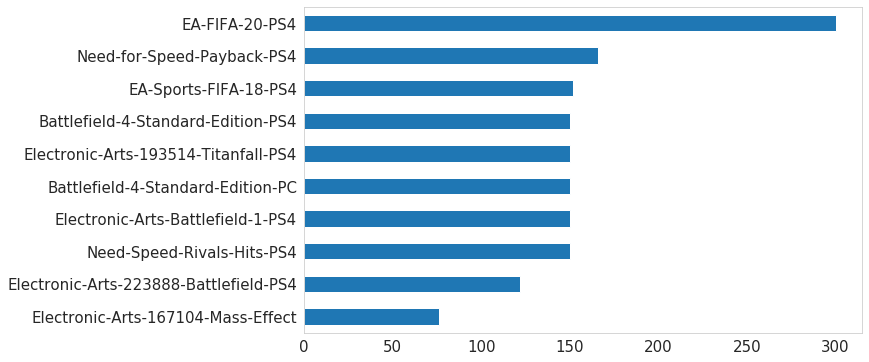

In [0]:
df['game_name'].value_counts()[0:10].plot('barh', figsize=[10,6], fontsize=15, grid=False).invert_yaxis()

In [0]:
time_df = df[['game_name','rating','review_date']]
time_df['review_date'] = time_df['review_date'].apply(lambda x: str(x.year)+'-'+str(x.month))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

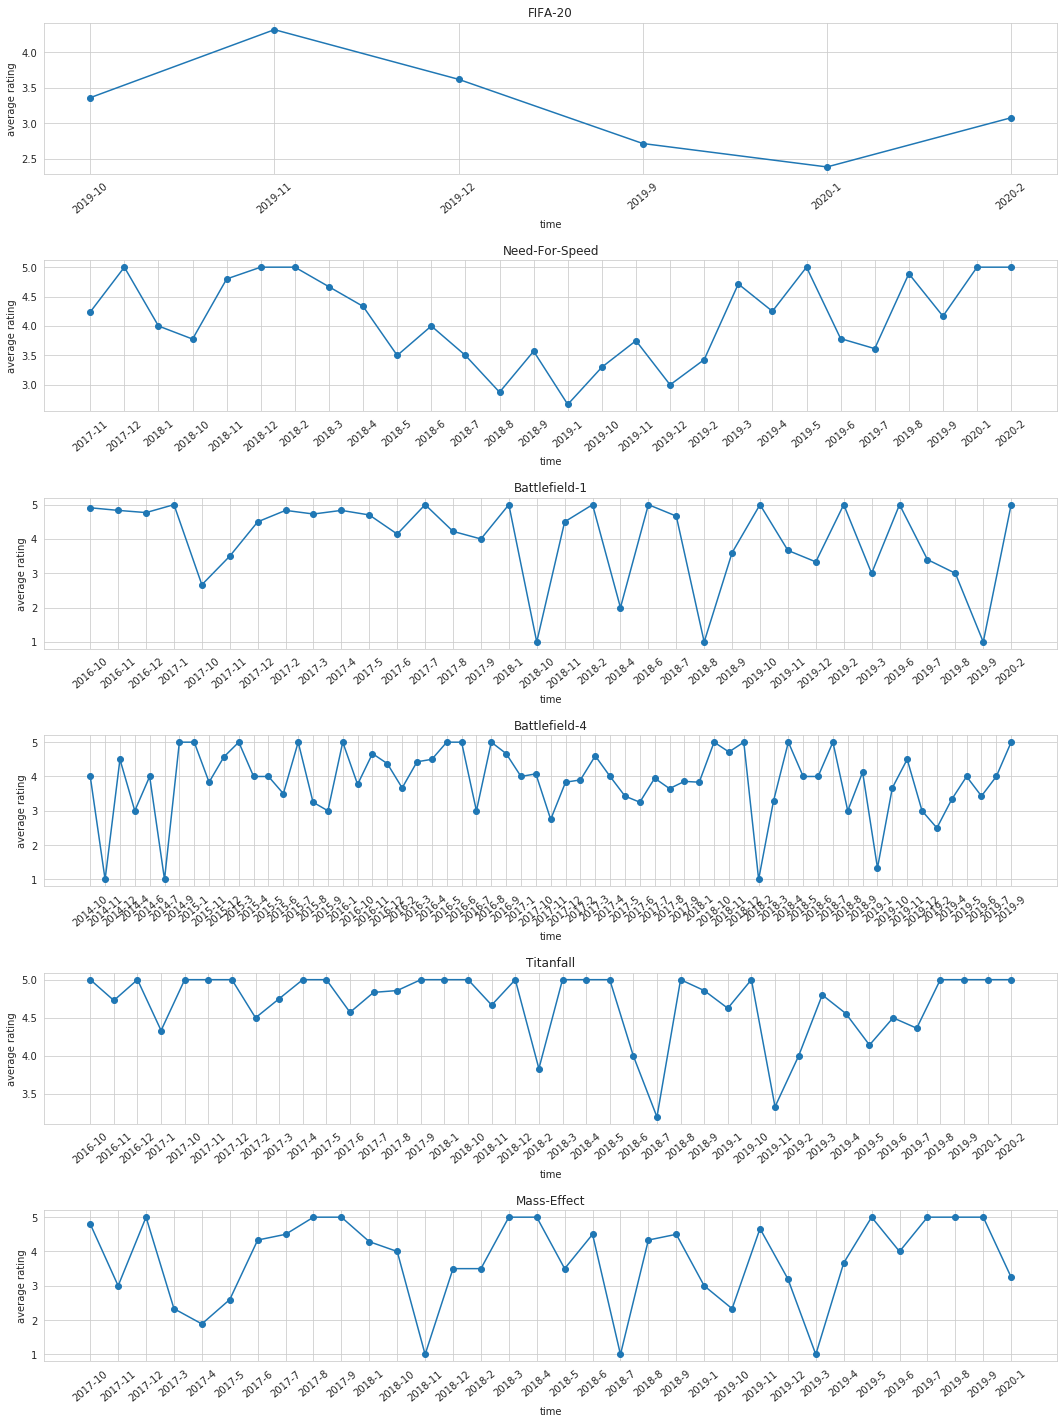

In [0]:
games = ['FIFA-20', 'Need-For-Speed', 'Battlefield-1','Battlefield-4','Titanfall','Mass-Effect']
fig, ax = plt.subplots(len(games),1,figsize=(15,20))#figsize=[15,5]
ax = ax.ravel()
for i,game in enumerate(games):
  time_df['game_name'] = time_df['game_name'].apply(lambda x: game if game.lower() in x.lower() else x)
  avg_reviews = time_df[time_df['game_name']==game].groupby(['review_date']).mean().reset_index()
  ax[i].plot(avg_reviews['review_date'],avg_reviews['rating'],'-o')
  ax[i].set_ylabel('average rating')
  ax[i].set_xlabel('time')
  ax[i].set_xticks(avg_reviews['review_date'])
  ax[i].set_xticklabels(avg_reviews['review_date'], rotation=40)
  ax[i].set_title(game)
fig.tight_layout(pad=1.5)
plt.show()

